In [3]:
## get edgs 
import json

with open('../test_data/rekrut_31_07_21_translated_logs.json', 'r+') as f:
    data_logs = json.load(f)

In [14]:
unique_ids.index(data_logs['1_1'][2])

3

In [5]:
ar =  [[0,0],[0,0]]
ar[1][0]=ar[1][0]+1

In [7]:
unique_ids = []
for key in data_logs : 
    for id_ in data_logs[key]:
        if id_ not in unique_ids :
            unique_ids.append(id_)
len(unique_ids)

1190

In [9]:
3*[0]

[0, 0, 0]

In [10]:
adj = []
for id_ in unique_ids : 
    adj.append([0]*len(unique_ids))

In [17]:
for key in data_logs : 
    for id_ in data_logs[key]:
        for  id_b in data_logs[key]:
            index = unique_ids.index(id_)
            index_b = unique_ids.index(id_b)
            #print(index,index_b)
            adj[index][index_b]=adj[index][index_b]+1

In [26]:
import numpy as np 
from scipy.sparse import csr_matrix
adj = np.array(adj)
adj = csr_matrix(adj)

In [28]:
import networkx as nx 


G = nx.from_scipy_sparse_matrix(adj)
#draw_adjacency_matrix(G)

In [35]:
import networkx as nx
from matplotlib import pyplot, patches

def draw_adjacency_matrix(G, node_order=None, partitions=[], colors=[]):
    """
    - G is a netorkx graph
    - node_order (optional) is a list of nodes, where each node in G
          appears exactly once
    - partitions is a list of node lists, where each node in G appears
          in exactly one node list
    - colors is a list of strings indicating what color each
          partition should be
    If partitions is specified, the same number of colors needs to be
    specified.
    """
    adjacency_matrix = nx.to_numpy_matrix(G, dtype=np.bool, nodelist=node_order)

    #Plot adjacency matrix in toned-down black and white
    fig = pyplot.figure(figsize=(5, 5)) # in inches
    pyplot.imshow(adjacency_matrix,
                  cmap="Greys",
                  interpolation="none")
    
    # The rest is just if you have sorted nodes by a partition and want to
    # highlight the module boundaries
    assert len(partitions) == len(colors)
    ax = pyplot.gca()
    for partition, color in zip(partitions, colors):
        current_idx = 0
        for module in partition:
            ax.add_patch(patches.Rectangle((current_idx, current_idx),
                                          len(module), # Width
                                          len(module), # Height
                                          facecolor="none",
                                          edgecolor=color,
                                          linewidth="1"))
            current_idx += len(module)

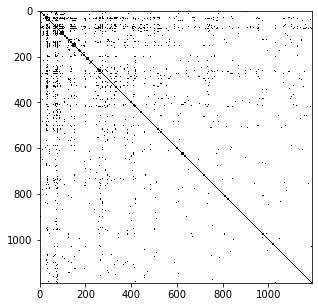

In [36]:
draw_adjacency_matrix(G)

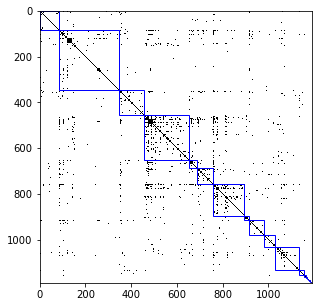

In [43]:
#!pip install python-louvain
from community import community_louvain
import collections


# Run louvain community finding algorithm
louvain_community_dict =  community_louvain.best_partition(G)

# Convert community assignmet dict into list of communities
louvain_comms = collections.defaultdict(list)
for node_index, comm_id in louvain_community_dict.items():
    louvain_comms[comm_id].append(node_index)
louvain_comms = louvain_comms.values()

nodes_louvain_ordered = [node for comm in louvain_comms for node in comm]
draw_adjacency_matrix(G, nodes_louvain_ordered, [louvain_comms], ["blue"])

In [54]:
import os
os.chdir("../")
  
os.getcwd()
# load default skills data base
from skillNer.general_params import SKILL_DB

In [57]:
attrs = {}

for i,id_ in enumerate(unique_ids) : 
    attrs[i] = {'id':id_,
                'name':SKILL_DB[id_]['skill_name']}
attrs 

{0: {'id': 'KS1243976G466GV63ZBY', 'name': 'French Language'},
 1: {'id': 'KS4425C7820LCHZS7VGX', 'name': 'Writing'},
 2: {'id': 'KSMNXY6MPS1EDWJ8P6B0', 'name': 'Enthusiasm'},
 3: {'id': 'KS1218W78FGVPVP2KXPX', 'name': 'Management'},
 4: {'id': 'ESAB6ED38CE1A5A0B5A4', 'name': 'Italian Language'},
 5: {'id': 'KS121Z26S4VJLQ1WXN21', 'name': 'Customer Service'},
 6: {'id': 'KS124TG6C6GQ3RGYBJ3G', 'name': 'Human Resource Management'},
 7: {'id': 'KS122HK6LN2MZHFY69GJ', 'name': 'Creativity'},
 8: {'id': 'KS1227F76Q36LXJTZTK1', 'name': 'Computer Networks'},
 9: {'id': 'KS1217P66NK6BW72M9FH', 'name': 'Customer Relationship Management'},
 10: {'id': 'ES70CD6E89F6DAD8F319', 'name': 'Relationship Management'},
 11: {'id': 'KS122B071LMGXVTT3Z91', 'name': 'Consulting'},
 12: {'id': 'ESA420F05EBBD34B3C2A', 'name': 'Curiosity'},
 13: {'id': 'KS120626HMWCXJWJC7VK', 'name': 'Adaptability'},
 14: {'id': 'KS121DS6GB09TFN7RLX0', 'name': 'Career Development'},
 15: {'id': 'KS120BV6SR75RBKQH0G3', 'name': '

In [58]:
nx.set_node_attributes(G, attrs)

In [85]:
id_ =   
index = unique_ids.index(id_)
[(G[n][index]['weight'] , G.nodes[n]) for n in G.neighbors(index)][:3]

[(1, {'id': 'KS4425C63RPH46FJ9BX7', 'name': 'Written Communication'}),
 (1, {'id': 'KS125F678LV2KB3Z5XW0', 'name': 'Problem Solving'}),
 (1, {'id': 'ESFA9982A2A945E439CB', 'name': 'Analytical Skills'})]

In [112]:
import pprint
pprint.pprint([(id_,SKILL_DB[id_]['skill_name']) for id_ in unique_ids])

[('KS1243976G466GV63ZBY', 'French Language'),
 ('KS4425C7820LCHZS7VGX', 'Writing'),
 ('KSMNXY6MPS1EDWJ8P6B0', 'Enthusiasm'),
 ('KS1218W78FGVPVP2KXPX', 'Management'),
 ('ESAB6ED38CE1A5A0B5A4', 'Italian Language'),
 ('KS121Z26S4VJLQ1WXN21', 'Customer Service'),
 ('KS124TG6C6GQ3RGYBJ3G', 'Human Resource Management'),
 ('KS122HK6LN2MZHFY69GJ', 'Creativity'),
 ('KS1227F76Q36LXJTZTK1', 'Computer Networks'),
 ('KS1217P66NK6BW72M9FH', 'Customer Relationship Management'),
 ('ES70CD6E89F6DAD8F319', 'Relationship Management'),
 ('KS122B071LMGXVTT3Z91', 'Consulting'),
 ('ESA420F05EBBD34B3C2A', 'Curiosity'),
 ('KS120626HMWCXJWJC7VK', 'Adaptability'),
 ('KS121DS6GB09TFN7RLX0', 'Career Development'),
 ('KS120BV6SR75RBKQH0G3', 'Artificial Intelligence'),
 ('KS1210269P78D7GH8LWY', 'Big Data'),
 ('KS1220H6CP1BQGH9STNK', 'Cloud Computing'),
 ('ESC80C5E846C65F847EB', 'Digital Transformation'),
 ('ES50E1CBF4827F546541', 'Virtual Reality'),
 ('KS126HY6YLTB9R7XJC4Z', 'Microsoft Office'),
 ('KS123K75YYK8VGH90

In [101]:
G.remove_node(691)

In [117]:
def func(u, v, d):

    distance = 1/(1+d.get("weight", 1))
    return distance

src,target = 'KS1222C6WKYWRKRXQCR0' , 'ESA91D8112EB9ECA3570'
src,target = unique_ids.index(src),unique_ids.index(target)

path = nx.dijkstra_path(G, src, target,weight =func )
[(n, SKILL_DB[unique_ids[n]]['skill_name']) for n in path ]

[(725, 'Version Control'),
 (119, 'Angular (Web Framework)'),
 (76, 'Java (Programming Language)'),
 (86, 'Git (Version Control System)')]

In [135]:
## assure quelaity graph via  :
### remove general skill nodes scal management , writing

In [158]:
## only those keys need to be matched on stemmed version ! others use cleaned version 
import re 

def condition (key):
    len_cond = SKILL_DB[key]['skill_len']==1 
    #not_contain_par = not any([j=='(' for j in SKILL_DB[key]['skill_name']])
    not_contain_digit = not any([j.isdigit() for j in SKILL_DB[key]['skill_cleaned']])
    s = re.sub("[\(\[].*?[\)\]]", "", SKILL_DB[key]['skill_name'])
    more_than_one_upper = not len([c for c in s if c.isupper()])>1
    return len_cond  and not_contain_digit and more_than_one_upper and s==SKILL_DB[key]['skill_name']

In [166]:
uni_skills = [key for key in SKILL_DB if condition(key) ]

In [167]:

uni_skills

['KSLGDAXJ4EFDMIOPMGL2',
 'KS1202N6LF0C1R6R5L0L',
 'KSLT5162L77EOKSI8AG7',
 'KS1202T6DM0DBC2PSHLH',
 'KS1202X65SZ3VM8V8RYB',
 'KS120316XL4914GMCBQK',
 'KS12034717M58DR8H8N9',
 'KS120377169JZ6CD0ZW0',
 'KS1203779S07YSRGPYY0',
 'KS1203H67QX1QWKFBVYP',
 'KSABZMV03QITJMWF5F99',
 'KS1203J6CK01YWBLBY6V',
 'KS7G7LT6PGPFH9YPKRMB',
 'KS1203S672G1690F076B',
 'KSV6631ZKTL538Y3QV16',
 'ES7A07CF87C516875B23',
 'KS1203W702ND09XHKJR5',
 'KS120496P0NDBPKP322Z',
 'KSCBN56GI5INML7HZ1I5',
 'KS1204V6WQ2PJQYPNBP7',
 'KS120505YWP3HFSBFK3C',
 'KS440MF6TWZP53L336ND',
 'KS120586SYV85C3KD16N',
 'KS1205D6BBWBWKN458V2',
 'KSTPL33KT5N4WEQ4RN8F',
 'KSYYFY8WM4W25UZ0Z38X',
 'KSW3DFI44NZWN60CX67I',
 'KS8HS8CM0ACY6UXJODCA',
 'KSX5K3A66M9O3TQN3DRW',
 'KS7BSX5SG6K3URXOHO7V',
 'KSI9QBPRXV7BI1XK7P55',
 'KSLUZKLZ18EVNG0EJQUJ',
 'KS1205R6C9RH3LF4DTZ0',
 'KS1205T794P560Z7BJ4R',
 'ES9351726FCFF4C7FA6A',
 'KSWZOK7VKW988X1PXD6B',
 'ES65E3EB43C6881FFB57',
 'KS1204C63M675GWJJ8KH',
 'KS1204C6LJCPYSN913LR',
 'KSEJZFLTMFCZ2ZK59YNU',


In [171]:
def weigthed_ratio(a,b,c):
    sum_ = sum([1/a,1/b,1/c])
    suma= sum([1/a,1/b])
    return suma/sum_
weigthed_ratio(20,10,30)

0.8181818181818182

In [170]:
2/3

0.6666666666666666